# Importing

In [1]:
import numpy as np
import pandas as pd

# Preprocessing

In [2]:
df = pd.read_csv('data.csv')

In [3]:
data = df.values

# Train and Test splits

In [4]:
# Set the values for N, N1, and N2
N = len(data)
N1 = int(N * 0.8)  # 80% of data for training
N2 = N - N1  # remaining 20% of data for testing

In [5]:
# Shuffle the data randomly
np.random.shuffle(data)

# Split the data into training and testing sets
X_train = data[:N1, :18]  # input training data
y_train = data[:N1, 18:20]  # target output training data
X_test = data[N2:, :18]  # input testing data
y_test = data[N2:, 18:20]  # target output testing data

# Hyperparameters

In [70]:
learning_rate = 0.001
iterations = 1000

# Input features
input_size = 18
 
# Hidden layers 
hidden_size = 20
 
# Output layer
output_size = 2
 
results = pd.DataFrame(columns=["mse", "accuracy"])

# Weights

In [71]:
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
b1 = np.random.normal(hidden_size)

# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
b2 = np.random.normal(output_size)

# Helper Functions

In [72]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# MSE
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

# Accuracy
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

# TPR
def tpr(y_pred, y_true):
    tpr = np.sum((y_true.argmax(axis=1) == 1) & (y_pred.argmax(axis=1) == 1)) / np.sum(y_true.argmax(axis=1) == 1)
    return tpr

# FPR
def fpr(y_pred, y_true):
    fpr = np.sum((y_true.argmax(axis=1) == 0) & (y_pred.argmax(axis=1) == 1)) / np.sum(y_true.argmax(axis=1) == 0)
    return fpr

# BackPropogation

In [73]:


for itr in range(iterations):    
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    tp = tpr(A2, y_train)
    fp = fpr(A2, y_train)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)
     
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    b2_update = np.mean(dW1, axis=0, keepdims=True)
    W1_update = np.dot(X_train.T, dW2) / N
    b1_update = np.mean(dW2, axis=0, keepdims=True)

    W2 = W2 - learning_rate * W2_update
    b2 = b2 - learning_rate * b2_update
    W1 = W1 - learning_rate * W1_update
    b1 = b1 - learning_rate * b1_update

# Results

<AxesSubplot:title={'center':'Mean Squared Error'}>

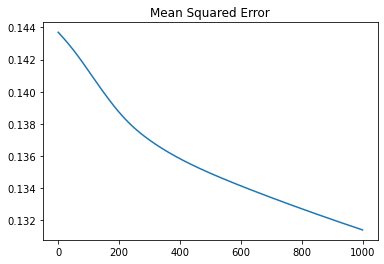

In [74]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

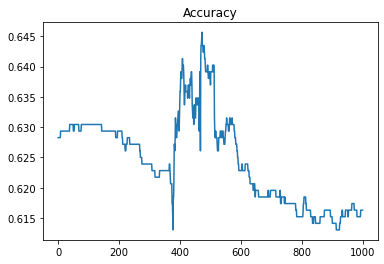

In [75]:
results.accuracy.plot(title="Accuracy")

In [76]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
 
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
 
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.6054347826086957


In [53]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

tp = tpr(A2, y_test)
print("True Positive Rate: {}".format(tp))

True Positive Rate: 0.8553459119496856


In [62]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

fp = fpr(A2, y_test)
print("False Positive Rate: {}".format(fp))

False Positive Rate: 0.654485049833887


# Using the Machine Learning Libraries

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

# Preprocessing

In [129]:
df2 = pd.read_csv('data.csv')

In [130]:
data2 = df2.values

# Splits

In [208]:
X = data2[:, :18]  # input data
y = data2[:, 18:20]  # target output data

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# MLP

In [154]:
# Create and train the MLP model
model = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.001, learning_rate='constant')
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.0001,
              max_iter=10000)

In [155]:
# Predict on the test set
y_pred = model.predict(X_test)

# Results

## MSE

In [156]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.27


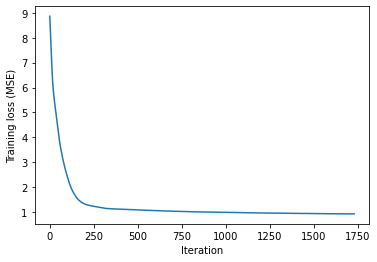

In [157]:
# Plot the training loss versus iteration number
plt.plot(model.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Training loss (MSE)')
plt.show()

## Accuracy

In [158]:
y_test_bin = np.round(y_test) # convert to binary categorical variable
y_pred_bin = np.round(y_pred)

In [159]:
accuracy = accuracy_score(y_test_bin, y_pred_bin)
print("Accuracy: {}".format(np.mean(accuracy)))

Accuracy: 0.5324675324675324


## MLP Metrics

In [145]:
# Compute confusion matrix, precision, recall, and f1-score
conf_mat = confusion_matrix(y_test_bin.ravel(), y_pred_bin.ravel())
precision = precision_score(y_test_bin.ravel(), y_pred_bin.ravel())
recall = recall_score(y_test_bin.ravel(), y_pred_bin.ravel())
f1 = f1_score(y_test_bin.ravel(), y_pred_bin.ravel())

In [68]:
# Print the results
print("Confusion matrix:\n", conf_mat)
print("\nPrecision: ", precision)
print("\nRecall: ", recall)
print("\nF1-score: ", f1)

Confusion matrix:
 [[218  44]
 [ 59 141]]

Precision:  0.7621621621621621

Recall:  0.705

F1-score:  0.7324675324675325


In [69]:
# Classification report
report = classification_report(y_test_bin.ravel(), y_pred_bin.ravel())
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       262
         1.0       0.76      0.70      0.73       200

    accuracy                           0.78       462
   macro avg       0.77      0.77      0.77       462
weighted avg       0.78      0.78      0.78       462



# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [317]:
y_pred_clf = clf.predict(X_test)

In [318]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.4762
